In [1]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [2]:
# opening the file
for expression in os.listdir("D://plant//plant diseases//train//"):
           print(str(len(os.listdir("D://plant//plant diseases//train//"+expression)))+
           " "+expression+ 'images')

2016 Apple___Apple_scabimages
1816 Blueberry___healthyimages
1920 Grape___Esca_(Black_Measles)images
2010 Orange___Haunglongbing_(Citrus_greening)images
1970 Potato___Early_blightimages
24 P_E_bimages
2022 Soybean___healthyimages


In [3]:
# Defining train and test data to train the model
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("D://plant//plant diseases//train//",target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("D://plant//plant diseases//valid//",target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 11778 images belonging to 7 classes.
Found 2931 images belonging to 6 classes.


In [6]:
#initialising CNN
model=Sequential()
#conv-1
model.add(Conv2D(64,(3,3), padding='same', input_shape= (48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#conv-2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#conv-3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#conv-4
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))
opt=Adam(learning_rate=0.0005)

In [7]:
#compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [8]:
epochs=5
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("mode_weights.h5", monitor="val_accuracy", save_weights_only=True, model='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.1, patience=2, min_lr= 0.00001, model= 'auto')

history= model.fit(
          x=train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=validation_steps)

#saving the model
model.save('plant_disease.h5')

Epoch 1/5
183/183 [==============================] - 462s 3s/step - loss: 0.3143 - accuracy: 0.8928 - val_loss: 0.3618 - val_accuracy: 0.8806
Epoch 2/5
183/183 [==============================] - 357s 2s/step - loss: 0.1144 - accuracy: 0.9620 - val_loss: 0.7989 - val_accuracy: 0.7493
Epoch 3/5
183/183 [==============================] - 318s 2s/step - loss: 0.0761 - accuracy: 0.9746 - val_loss: 0.1328 - val_accuracy: 0.9524
Epoch 4/5
183/183 [==============================] - 317s 2s/step - loss: 0.0683 - accuracy: 0.9767 - val_loss: 0.5363 - val_accuracy: 0.8142
Epoch 5/5
183/183 [==============================] - 317s 2s/step - loss: 0.0447 - accuracy: 0.9851 - val_loss: 0.2866 - val_accuracy: 0.9122


In [4]:
from tensorflow.keras.models import load_model
classifier = load_model('plant_disease.h5')

'P_E_b'

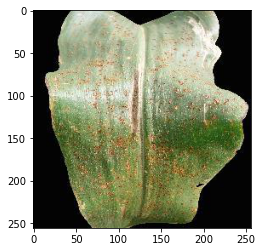

In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = "D://plant//test//CornCommonRust2.jpg"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(48,48))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
        p=name[i]
p